In [18]:
%matplotlib inline
import pandas as pd
from sklearn import metrics, model_selection, ensemble
import matplotlib.pyplot as plt

df = pd.read_csv('suumo_treated_DB.csv', sep = '\t', index_col=0)
df = df.drop(df.index[df['total_annual_cost'] > 100000000])

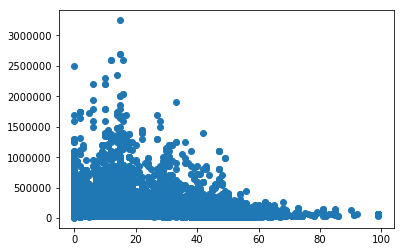

In [19]:
#df = df.drop(df.index[df['age'] == 99])
plt.scatter(df['age'], df['monthly_rent'])

In [20]:
df = df.drop(df.index[df['floor'] < -2 ])

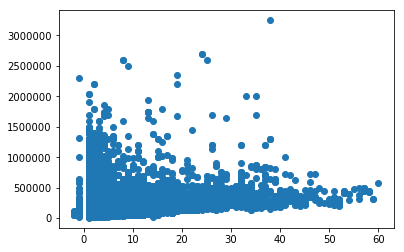

In [21]:
plt.scatter(df['floor'], df['monthly_rent'])
plt.show()

In [22]:
df = df.drop(df.index[df['floor_plan'] > 9 ])

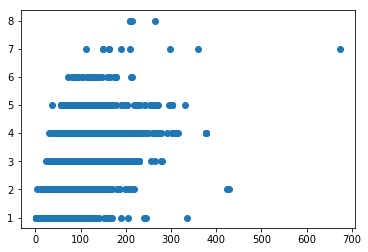

In [23]:
plt.scatter(df['surface'], df['floor_plan'])
plt.show()

In [24]:
df = df.drop(df.index[df['surface'] > 350])

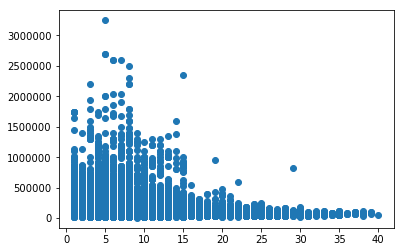

In [25]:
df = df.drop(df.index[(df['walk_min1'] > 40) ])
plt.scatter(df['walk_min1'], df['monthly_rent'])
plt.show()

In [26]:
ward = pd.get_dummies(df['ward'])

In [27]:
df_o = df[['floor_plan', 'plan_DK','plan_L','plan_K','plan_S','age','story', 'floor','surface','walk_min1', 'monthly_rent']]
df_o = pd.merge(df_o, ward, left_index=True, right_index=True)
df_o = df_o.dropna()
label = df_o['monthly_rent']
df_o.drop(['monthly_rent'], axis=1, inplace=True) 
data = df_o
data.head()

,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,surface,walk_min1,...,江戸川,江東,渋谷,港,目黒,練馬,荒川,葛飾,豊島,足立
0,1,0,0,0,0,6,2,1,4.33,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,47,5,5,9.72,5.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,47,5,5,9.72,5.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,47,5,5,9.72,7.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,37,8,2,18.72,10.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#params = [{"n_estimators": [10, 100, 300]}]
#clf = GridSearchCV(ensemble.RandomForestRegressor(), params)
data_train, data_test, label_train, label_test = \
    model_selection.train_test_split(data, label, test_size=0.20)

#n_est = [10, 50, 100, 150, 250]
n_est = [150]
for est in n_est:
    
    clf = ensemble.RandomForestRegressor(n_estimators=est)
    clf.fit(data_train, label_train)
    print(clf.score(data_train, label_train))
    print(clf.score(data_test, label_test))

0.987782008983
0.953077871437


In [30]:
from sklearn.externals import joblib

joblib.dump(clf, 'suumo_rent_monthly_rent.pkl')

['suumo_rent_monthly_rent.pkl']

In [31]:

test_reindex = pd.merge(data_test, label_test.to_frame(), left_index=True, right_index=True)
test_reindex = test_reindex.sort_values(by='monthly_rent').reset_index()

del test_reindex['index']

test_reindex.head()

,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,surface,walk_min1,...,江東,渋谷,港,目黒,練馬,荒川,葛飾,豊島,足立,monthly_rent
0,1,0,0,0,0,51,3,3,9.61,13.0,...,1,0,0,0,0,0,0,0,0,20000
1,1,0,0,0,0,52,3,1,10.01,3.0,...,0,0,0,0,0,0,0,0,0,20000
2,1,0,0,0,0,48,2,2,10.00,15.0,...,0,0,0,0,0,0,0,0,1,20000
3,1,0,0,1,0,54,2,2,9.72,22.0,...,0,0,0,0,0,0,0,0,0,20000
4,1,0,0,1,0,38,2,2,12.00,8.0,...,0,0,0,0,0,0,0,0,0,20000


In [32]:
Y  = test_reindex['monthly_rent']
test_reindex.drop(['monthly_rent'], axis=1, inplace=True)
X = test_reindex

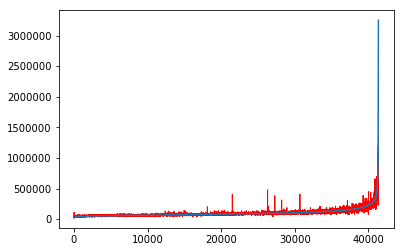

In [33]:
plt.plot(X.index, clf.predict(X), color='red', linewidth=1)
plt.plot(test_reindex.index, Y)
plt.show()

In [34]:
residual_RF = (Y-clf.predict(X))**2
residual_RF_total = residual_RF.sum()
#print(mean_absolute_error(Y, clf.predict(X)))
print(residual_RF_total)

1.0676199764e+13
